In [ ]:
from google.colab import files

# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anushkashukla1","key":"94547a9d48ff1b0b4d3dd19739576809"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle  # Create a hidden kaggle directory
!mv kaggle.json ~/.kaggle/  # Move kaggle.json there
!chmod 600 ~/.kaggle/kaggle.json  # Set proper permissions

In [ ]:
!kaggle datasets download -d sumithsingh/blood-cell-images-for-cancer-detection

Dataset URL: https://www.kaggle.com/datasets/sumithsingh/blood-cell-images-for-cancer-detection
License(s): Attribution 4.0 International (CC BY 4.0)


In [ ]:
!unzip -q blood-cell-images-for-cancer-detection.zip -d blood_cancer_dataset

In [ ]:
!ls

blood_cancer_dataset  blood-cell-images-for-cancer-detection.zip  sample_data


In [ ]:
import os

image_path = "blood_cancer_dataset"
subfolders = os.listdir(image_path)

print("Subfolders found:", subfolders)  # This should print all subfolders

Subfolders found: ['monocyte', 'myeloblast', 'seg_neutrophil', 'basophil', 'erythroblast']


In [ ]:
sample_folder = os.path.join(image_path, subfolders[0])  # First subfolder
image_files = os.listdir(sample_folder)

print(f"Total images in {subfolders[0]}:", len(image_files))
print("First 5 images:", image_files[:5])

Total images in monocyte: 1000
First 5 images: ['MO_134722.jpg', 'MO_770326.jpg', 'MO_692135.jpg', 'MO_612179.jpg', 'MO_104431.jpg']


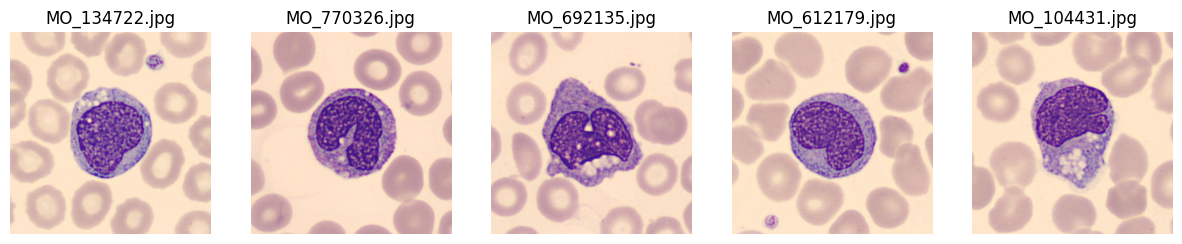

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Get all image file paths inside subfolders
all_images = []
for subfolder in subfolders:
    folder_path = os.path.join(image_path, subfolder)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        all_images.append(img_path)

# Display first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_path in enumerate(all_images[:5]):  # Take first 5 images
    img = cv2.imread(img_path)

    if img is None:
        print(f"Skipping {img_path} (not readable)")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(os.path.basename(img_path))

plt.show()

In [ ]:
# Import required libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [ ]:
# Set image dimensions and paths
IMAGE_SIZE = (128, 128)  # Resize images to 128x128
DATASET_PATH = "blood_cancer_dataset"

In [ ]:
# Get subfolders (class names)
class_names = os.listdir(DATASET_PATH)
print("Classes:", class_names)

Classes: ['monocyte', 'myeloblast', 'seg_neutrophil', 'basophil', 'erythroblast']


In [ ]:
# Load dataset
def load_dataset(image_size=IMAGE_SIZE):
    images, labels = [], []

    for class_index, class_name in enumerate(class_names):
        class_folder = os.path.join(DATASET_PATH, class_name)
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            img = cv2.imread(img_path)

            if img is None:
                print(f"Skipping corrupted image: {img_path}")
                continue

            img = cv2.resize(img, image_size)  # Resize
            img = img / 255.0  # Normalize (0-1 range)

            images.append(img)
            labels.append(class_index)

    return np.array(images), np.array(labels)

In [ ]:
# Load and split the dataset
X, y = load_dataset()
print("Total images:", X.shape[0])

Total images: 5000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Training images:", X_train.shape[0], "Testing images:", X_test.shape[0])

Training images: 4000 Testing images: 1000


In [ ]:
#Data Augmentation
#datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
#datagen.fit(X_train)

In [ ]:
# Create Custom CNN Model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Prevent overfitting
        Dense(len(class_names), activation='softmax')  # Output layer (Number of classes)
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
model = create_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks (Early Stopping and Checkpoint)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True)
]

In [ ]:
# Train the Model without Data Augmentation
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=32,
                    callbacks=callbacks)

Epoch 1/20
117/125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3369 - loss: 1.4392

125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.3476 - loss: 1.4201 - val_accuracy: 0.8070 - val_loss: 0.6305
Epoch 2/20
121/125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6921 - loss: 0.7293

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6934 - loss: 0.7270 - val_accuracy: 0.8370 - val_loss: 0.4882
Epoch 3/20
117/125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7713 - loss: 0.5662

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7717 - loss: 0.5655 - val_accuracy: 0.8720 - val_loss: 0.4235
Epoch 4/20
120/125 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8192 - loss: 0.5067

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8199 - loss: 0.5051 - val_accuracy: 0.8890 - val_loss: 0.3215
Epoch 5/20
123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8561 - loss: 0.4036

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.4028 - val_accuracy: 0.9260 - val_loss: 0.2388
Epoch 6/20
124/125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9006 - loss: 0.3094

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9006 - loss: 0.3094 - val_accuracy: 0.9330 - val_loss: 0.2029
Epoch 7/20
122/125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9165 - loss: 0.2587

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9165 - loss: 0.2585 - val_accuracy: 0.9480 - val_loss: 0.1568
Epoch 8/20
117/125 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9352 - loss: 0.2276

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9349 - loss: 0.2278 - val_accuracy: 0.9490 - val_loss: 0.1504
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9315 - loss: 0.2187 - val_accuracy: 0.9380 - val_loss: 0.1654
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9435 - loss: 0.1900

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9435 - loss: 0.1900 - val_accuracy: 0.9560 - val_loss: 0.1185
Epoch 11/20
121/125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9439 - loss: 0.1880

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9440 - loss: 0.1877 - val_accuracy: 0.9630 - val_loss: 0.1054
Epoch 12/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9500 - loss: 0.1637 - val_accuracy: 0.9610 - val_loss: 0.1139
Epoch 13/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9462 - loss: 0.1515 - val_accuracy: 0.9500 - val_loss: 0.1571
Epoch 14/20
118/125 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9551 - loss: 0.1470

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9552 - loss: 0.1466 - val_accuracy: 0.9630 - val_loss: 0.0990
Epoch 15/20
122/125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9603 - loss: 0.1346

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9603 - loss: 0.1345 - val_accuracy: 0.9710 - val_loss: 0.0840
Epoch 16/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9666 - loss: 0.1192 - val_accuracy: 0.9610 - val_loss: 0.1124
Epoch 17/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9543 - loss: 0.1343 - val_accuracy: 0.9690 - val_loss: 0.0847
Epoch 18/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9639 - loss: 0.1095 - val_accuracy: 0.9670 - val_loss: 0.0965
Epoch 19/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9717 - loss: 0.1002

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9717 - loss: 0.1003 - val_accuracy: 0.9700 - val_loss: 0.0788
Epoch 20/20
124/125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9636 - loss: 0.1169

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9637 - loss: 0.1167 - val_accuracy: 0.9770 - val_loss: 0.0761


In [ ]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9826 - loss: 0.0610

✅ Test Accuracy: 97.70%


In [ ]:
# Save the Model
model.save("blood_cancer_cnn.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


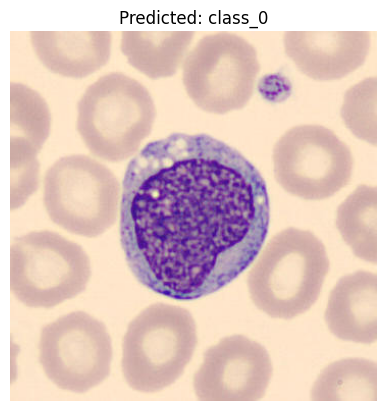

Model Prediction: class_0


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ensure the model is compiled before making predictions
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Define function to predict image
def predict_image(img_path, model, class_names):
    if not os.path.exists(img_path):
        print(f"Error: Image file not found at {img_path}")
        return

    img = cv2.imread(img_path)

    if img is None:
        print(f"Error: Image not loaded! Check file format and path.")
        return

    # Preprocess the image
    img = cv2.resize(img, (128, 128))  # Resize to match model input size
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Expand dimensions for model input

    # Make prediction
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    class_label = class_names[predicted_class]

    # Display image with prediction
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Predicted: {class_label}")
    plt.show()

    return class_label

# Define class names (Update this list as per your dataset)
class_names = ["class_0", "class_1", "class_2", "class_3"]  # Replace with actual class labels

# Path to the test image

test_image_path = os.path.join("blood_cancer_dataset", "monocyte", "MO_134722.jpg")
# Run prediction
prediction = predict_image(test_image_path, model, class_names)
print("Model Prediction:", prediction)